In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import model_selection
from sklearn import linear_model

LOADING THE DATASET

In [13]:
df=pd.read_csv("dataset.csv")
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print("Load the data")
df

Load the data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


MATRIX SIZE AND SHAPE

In [4]:
df.shape

(25, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


GROUPING THE DATASET WRT MEAN

In [8]:
df.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

INSPECTING THE DATASET

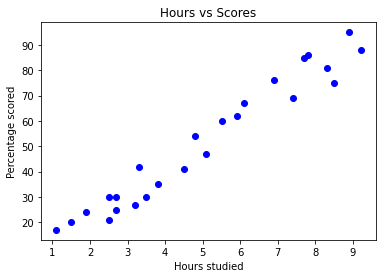

In [10]:
plt.scatter(df['Hours'],df['Scores'], color='Blue',marker='o')
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Plotting the regression line')

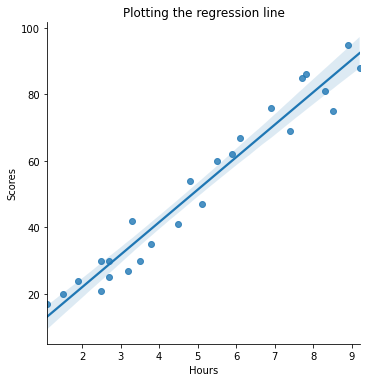

In [12]:
sns.lmplot(x="Hours", y="Scores", data=df)
plt.title("Plotting the regression line")

In [14]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [15]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


SPLITTING THE DATASET INTO TRAINING AND TESTING SET

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

APPLYING REGRESSION ON THE TRAINING SET

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

PREDICTING THE TEST SET RESULTS

In [22]:
y_pred = regressor.predict(x_test)

In [23]:
print(y_pred)

[17.04289179 33.51695377 74.21757747 26.73351648 59.68164043 39.33132858
 20.91914167 78.09382734 69.37226512]


VISUALIZE THE TRAINING SET RESULTS

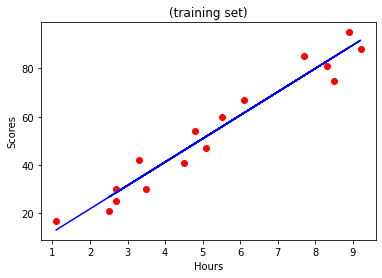

In [24]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('(training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

VISUALIZING THE TEST SET RESULTS

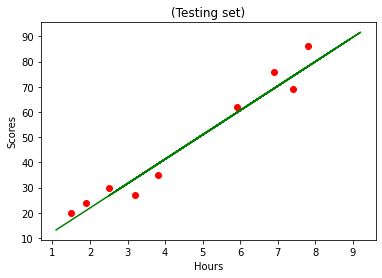

In [25]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train),color='green')
plt.title('(Testing set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

VISUALIZING THE DIFFERENCES BETWEEN ACTUAL SCORES AND PREDICTED SCORES

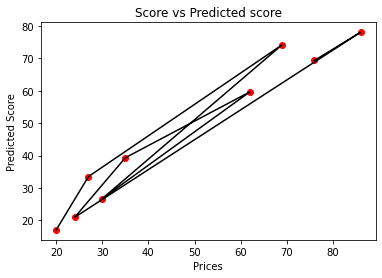

In [27]:
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_pred,color='black')
plt.xlabel('Prices')
plt.ylabel('Predicted Score')
plt.title("Score vs Predicted score")
plt.show()

WHAT WILL BE PREDICTED SCORE IF STUDENT STUDIES FOR 9.25 hrs/day

In [28]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predict Score = {}".format(predict[0]))

No of Hours = [[9.25]]
Predict Score = 92.14523314523316


ACCURACY

In [29]:
print("Train : ",regressor.score(x_train,y_train)*100)
print("Test : ",regressor.score(x_test,y_test)*100)

Train :  95.01107277744313
Test :  95.55700801388129


FINDING MEAN ABSOLUTE ERROR,R^2 SCORE ERROR AND MEAN SQUARED ERROR

In [31]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean absolute error:', metrics.mean_absolute_error(y_test, regressor.predict(x_test))) 
print('r^2 score error:',r2_score(y_test, regressor.predict(x_test)))
print('Mean squared error: ',mean_squared_error(y_test, regressor.predict(x_test)))

Mean absolute error: 4.691397441397446
r^2 score error: 0.9555700801388128
Mean squared error:  25.463280738222593
